<a href="https://colab.research.google.com/github/wdon021/Comp261_A5/blob/master/Comp421_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

% Title
% ----
\title{Nueral Network: Projects 3D normal-dsitrbuted data onto a unit-radius Sphere}
%

### Introduction
Task: Create a (fully connected) neural network model that approximate the function for project input data x (normal-distributed) onto a unit-radius sphere space.

$y = f(x; \theta, w) = \phi(x; \theta)^T w$

Structure of report
1. create Dataset X and corresponding Y that projected on the unit sphere.
2. Define a cost function
3. Define a optimization procedure
4. Define a model
5. Train the Model
6. Define parameters
7. Model performance
8. Prediction

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [55]:
mean = [0, 0, 0]
cov = [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]

$\mu = [0, 0, 0]$

$\Sigma=
\begin{bmatrix} 
1 & 0 & 0 \\
0 & 1 & 0\\
0 & 0 & 1 \\
\end{bmatrix}
$

X is generated with mean =0 and variance =1 (standard deviation = 1), they are randomly cluster around co-cordinate of [0, 0, 0] in a 3-D space.
$X_i$ is linearly independent to each other with $i = \{1, 2, 3\}$. 

Y = X normalized by its euclidean distance.

$Y_{ij} = \frac{X_{ij}}{\sqrt{X_{1j}^2 + X_{2j}^2+X_{3j}^2}}$

Denominator is the radius of the sphere.

In [56]:
def unit_sphere(data):
  return np.array([[coord / math.sqrt(sum(coords * coords for coords in line)) for coord in line] for line in data])

In [57]:
united = np.random.multivariate_normal(mean, cov, 4000)

In [58]:
x11, x22, x33 = united.T
united_y = unit_sphere(united)

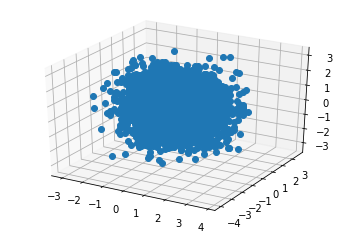

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, x33, 'o')

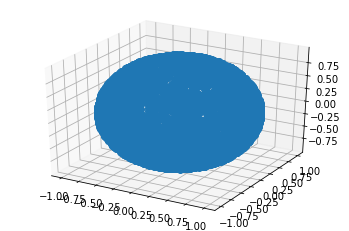

In [ ]:
x111, x222, x333 = united_y.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x111, x222, x333, 'o')

### Training, validation, test split
- using the train_test_split() function provided in sklearn.
- Call the function twice to acquire Training set, Validation set and test set. 

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(united, united_y, test_size = 0.25)

In [60]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25)

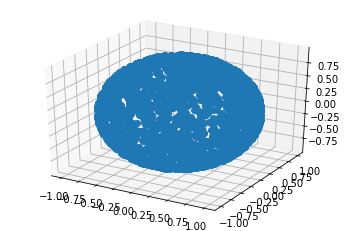

In [61]:
x11x, x22x, x33x = Y_train.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11x, x22x, x33x, 'o')

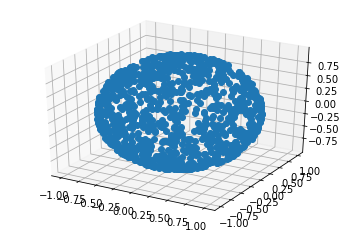

In [62]:
x11, x22, x33 = Y_test.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, x33, 'o')

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
import keras.backend as kb
import tensorflow as tf
from tensorflow.keras import layers
import datetime

In [92]:
inputs = keras.Input(shape = (3,))
x1 = layers.Dense(10, activation="relu")(inputs)
x2 = layers.Dense(10, activation='relu')(x1)
outputs = layers.Dense(3, activation='linear')(x2)
model = keras.Model(inputs = inputs, outputs = outputs)

### Define Nueral Network architecture

This is a Three-layer feedforward neural network

$f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x)))$

$f^{(1)}$ is the first hidden layer with 10 neurons and activation function = ReLU

$F^{(1)}(x) = W^Tx$

In our case $x=[x_1, x_2, x_3]$

$h_i = max\{0, x* \begin{bmatrix}{w_1 \\ w_2 \\ w_3} \end{bmatrix} + bias\}$

$h_i$ is the first neuron of the first hidden layer, $i= \{1,2,..,10\}$, in 1 row.
We have 10 neurons (unit) in the first hidden layer, so we have to multiply 10 sets of weights

$$
max\{0,
\begin{bmatrix}
w_{0,1} & w_{0,2} & w_{0,3} \\
w_{1,1} & w_{1,2} & w_{1,3} \\
w_{2,1} & w_{2,2} & w_{2,3} \\
\vdots & \vdots & \vdots \\
w_{9,1} & w_{9,2} & w_{9,3} \\
\end{bmatrix} *\begin{bmatrix}{x_0^{(0)} \\ x_1^{(0)} \\ x_2^{(0)}} \end{bmatrix} + \begin{bmatrix}{b_0 \\ \vdots \\ b_9} \end{bmatrix}\}
$$

Applying ReLU function to each specific component of the resulting vector inside.

Now we have a vector of activations for the first hidden layer $h^{(1)}$.


$f^{(2)}$ is the second hidden layer with 10 neurons, and ReLU activation functions.


$$
max\{0,
\begin{bmatrix}
w_{0,1} & \cdots & w_{0,9} \\
w_{1,1} & \cdots & w_{1,9} \\
w_{2,1} & \cdots & w_{2,9} \\
\vdots & \vdots & \vdots \\
w_{9,1} & \cdots & w_{9,9} \\
\end{bmatrix} *\begin{bmatrix}{h_0^{(1)} \\ h_1^{(1)} \\ \vdots \\ h_9^{(1)}} \end{bmatrix} + \begin{bmatrix}{b_0 \\ \vdots \\ b_9} \end{bmatrix}\}
$$

Applying ReLU function to each specific component of the resulting vector inside.

Now we have a vector of activations for the second hidden layer $h^{(2)}$.


$f^{(3)}$ is an output layer with 3 output units, and Linear activation

$$
c*\{
\begin{bmatrix}
w_{0,1} & \cdots & w_{0,9} \\
w_{1,1} & \cdots & w_{1,9} \\
w_{2,1} & \cdots & w_{2,9} \\
\end{bmatrix} *\begin{bmatrix}{h_0^{(2)} \\ h_1^{(2)} \\ \vdots \\ h_9^{(2)}} \end{bmatrix} + \begin{bmatrix}{b_0 \\ b_1 \\ b_2} \end{bmatrix}\}
$$

Applying Linear function to each specific component of the resulting vector inside.


In [93]:
# training dataset
batch_size = 100

In [94]:
X_train = tf.cast(X_train, tf.float32)
Y_train = tf.cast(Y_train, tf.float32)

In [95]:
X_val = tf.cast(X_val, tf.float32)
Y_val = tf.cast(Y_val, tf.float32)

In [96]:
X_test = tf.cast(X_test, tf.float32)

In [97]:
# creates a dataset with a separate element fro each row of the input tensor
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(buffer_size= 3000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).shuffle(1000).batch(batch_size)

In [98]:
optimizer = tf.keras.optimizers.Adam(0.1)
epochs = 500

In [99]:
# create an loss function # not effective
def Keras_loss_function(y_actual, y_predicted):
  mse = kb.mean(kb.sum(kb.square(y_actual - y_predicted))) # (1/n*(sum(sqr(Y-Y_hat))))
  return mse

# first 100 epochs is useful

In [100]:
# create an loss function for test_set
def test_score(prediction, Y_test):
  return np.mean(np.sum(np.square(prediction- Y_test), axis=1))

### Design a cost function
For MiniBatch size = N
Y_actual and Y_predict is a 100 (rows) * 3(columns) matrix

2 Options

First Option - custom cost function

$$
\frac{\sum\limits_{j=1}^{N} \sum\limits_{i=1}^3 (Y_{actual(j,i)} - Y_{predict(j,i)})^2}{N}
$$

This is more traditional, one loss score for each mini-batch trained

Second Option - tf.keras.losses.MSE

$$
\frac{\sum\limits_{i=1}^3 (Y_{actual(j,i)} - Y_{predict(j,i)})^2}{3}
$$

output is a vector of loss score associates with each row in the minibatch.


### Model preparation
1. Generate 4,000 rows of X and corresponding Y
2. using the train_test_split() function provided in sklearn.
3. Call the function first time to have 20% of dataset as test set, then call the function second time on the remaining 80% to get the training set and validation set.
4. call tf.data.Dataset.from_tensor_slices() to create an input pipeline for both training and validation set, then chain with Dataset.batch() to make the Dataset object iterable.
5. Define optimization function = 'Adam' with learning rate 0.001


## Modelling
1. In 1 epoch
1. Sample a mini-batch = 100 rows from X_train and Y_train. 
2. Calculate the $\hat{Y}$ by complete one feedforward process with the Nueral Network architecture described above.

$\hat{Y} = a*\{W_3*max\{0, W_2*max\{0, W_1*x +b_1\}+b_2\} + b_3\}$
3. $W_1$ and $ W_2$  $W_3$ are the 3 weight matrix.
4. they all initialized with very small randome non-zero number.
5. $b_1, b_2, b_3$ are bias vectors, initialized with 0.
6. After calculated the $\hat{Y}$, apply the loss function to the $\hat{Y}$ and actual $Y$ to get the score of performance of the feedforward model. 
7. Then the model calculates the partial derivative for each weight in weight matrix and each bias in every bias vector.

### Update the weight

- using standard Stochastic gradient descent, each weight and bias is updated by
  - $w \leftarrow  w -$ learning rate * gradient of w with respect to the cost function.

- THe gradient with respect to each weight in the cost function is calculated in backpropagation using the chain rule.

1. $h_1 = W_1x +b_1$
2. $z_1 = \alpha (h_1)$. $\alpha $ is the ReLU activation function
3. $h_2 = W_2z_1 + b_2$
4. $z_2 = \alpha(h_2)$
5. $h_3 = W_3z_2 + b_3$
5. $z_3 = \alpha(h_3)$
6. $L = LL(z_3 -Y) $

- To calculate the partial derivative of one of weight $w_i$ in $W_3$ with respect to the $L$, in other word, how sensitive the $L$ function is to the small change of the $w_i$.

$$
\frac{\partial L}{\partial W_3} = \frac{\partial L}{\partial z_3} * \frac{\partial z_3}{\partial h_3}*\frac{\partial h_3}{\partial W_3}
$$

- If I trying to solve it
- $ \frac{\partial L}{\partial z_3} = 2(z_3 - Y)$, Z_3 and Y are both vector in this case.
- $ \frac{\partial z_3}{\partial h_3}$ this $\alpha$ is the linear function is just a constant, so its basically the derivative of $h_3$
- $\frac{\partial h_3}{\partial W_3}$ is basically the derivative of $z_2$, which is $\alpha'(h_2)$


- And this is just one data point in one minibatch.
- Model get the average $\frac{\partial L}{\partial W_3}$ in this minibatch size of $n$.

$$
\frac{\partial L}{\partial W_3} = \frac{1}{n} \sum\limits_{i=0}^{n-1}\frac{\partial L}{\partial W_3} 
$$

- same procedure applys to other weights and bias.
- The weight is update by optimizer("Adam"), according to its gradient and learning rate.


In [101]:
training_mse = np.array([])
valid_mse = np.array([])

In [102]:
for epoch in range(epochs):
  print("\nStart of epoch########################################### %d \n" % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

    # open a GradientTape to record the operations run during the feed forward
    # enables aoto-partial-Differentiation
    with tf.GradientTape() as tape:
      # run the feed foward process of the layers.
      # the operations that the layers apply to its inpurts and going to bee recorded on the GradientTape
      linear = model(x_batch_train, training = True)
      # compute the loss value for this minibatch
      mse = Keras_loss_function(y_batch_train, linear)
      # mse = tf.keras.losses.MSE(y_batch_train, linear)
      # mse = keras.losses.mean_squared_error(y_batch_train, linear) # mse gives 3 number
    # print(mse)
    # use the gradient tap to automatically retrieve the gradients of the 
    # trainable variables with respect to the loss
    # print(model.trainable_weights)
    grads = tape.gradient(mse, model.trainable_weights)
    # print(grads)
    # weight + bias for every layer
    # run one step of gradient dscent by updating the value of the variables to minize the loss
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    # print(optimizer.weights)
    # print(model.trainable_weights,'\n')
    # print log information every 10 batches.
    if step % 10 == 0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
          %(step, float(mse))
      )
      print("seen so far: %s samples" % ((step +1) * 100))


  # Run a validation loop at the end of each epoch
  for x_batch_val, y_batch_val in val_dataset:
    val_linear = model(x_batch_val, training = False)
    val_mse = Keras_loss_function(y_batch_val, val_linear)

  # print MSE for validation set
  print("validation MSE: %.4f" % (float(val_mse)))
  training_mse = np.append(training_mse, float(mse))
  valid_mse = np.append(valid_mse, float(val_mse))

Streaming output truncated to the last 5000 lines.
Start of epoch########################################### 0 

Training loss (for one batch) at step 0: 104.0796
seen so far: 100 samples
Training loss (for one batch) at step 10: 18.0967
seen so far: 1100 samples
Training loss (for one batch) at step 20: 13.7354
seen so far: 2100 samples
validation MSE: 6.7580

Start of epoch########################################### 1 

Training loss (for one batch) at step 0: 14.6983
seen so far: 100 samples
Training loss (for one batch) at step 10: 6.9907
seen so far: 1100 samples
Training loss (for one batch) at step 20: 6.1009
seen so far: 2100 samples
validation MSE: 2.9359

Start of epoch########################################### 2 

Training loss (for one batch) at step 0: 7.7783
seen so far: 100 samples
Training loss (for one batch) at step 10: 3.3002
seen so far: 1100 samples
Training loss (for one batch) at step 20: 3.9367
seen so far: 2100 samples
validation MSE: 2.3386

Start of epoch###

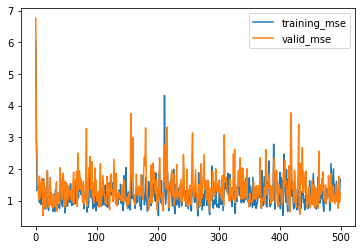

In [103]:
performance = pd.DataFrame()
performance['training_mse'] = training_mse
performance['valid_mse'] = valid_mse
performance.plot()

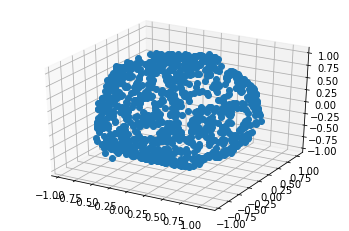

In [104]:
prediction = model.predict(X_test)
f1, f2, f3 = prediction.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(f1, f2, f3, 'o')

In [105]:
test_score(prediction, Y_test)

0.033374189985640866

### Baeline Result
The plot of training validation performance, the MSE decrease rapidly over the first 50 epochs for both training and validation, then the rate of learning is decreased, training loss is decreased by 0.5 for another 100+ epoches. Then it looks like for the rest of 300-500 epochs, the SGD is jumping from one local minimum to another local minimum, but never fully converged(gradient =0).
(can try different optimizer)

The plot for output of prediction using test set, it looks like most of $\hat{Y}$ is on unit-sphere surface(scale within $\pm 1$), but still there is an edge on the surface indicates the model is not generalized well to the test set(but model never fully converged anyway). The final test score is 0.012


### result and discussion
Look into the gradient matrix for start of epoch, it is obvious that change the weights and biases for the first hidden layer has more impact to the loss function because they are much larger than later weights.
The gradient of weights in epoch 0 is huge (44.24), but after 500 epoch of training, most of gradients decrease to less than 1, but won't reach 0, so I assume model hits the local minimum.

#### Different cost function
Aslo, I have tried using the build-in MSE() function in keras. It produce a vector of loss scores for each row in the minibatch, and gradients been calculated according to those loss scores. The test score is = 0.0093, which is better than custom cost function test score.


#### Different mini-batch size
With mini-batch size = 200(twice as big as baseline), the test score almost the same, but the rate of MSE decrease in training set is much faster than validation set. Which means larger the mini-batch size decrease the generaliziblity of model.

### Difference learning rate
Baseline learning rate is 0.001, current learning rate is 0.1, model is much harder to train and less stable (more likely to overshot). The prediction is much worse 0.033

The goal of maximum likelihood estimation is to find the values of the model parameters $\theta$ that maximize the likelihood function over the parameter space $L_n(\theta)$.

Which can be achieved by finding the $\frac{\partial L}{\partial \theta}$.
This is practically the same in the NN-model we describe above, where we trying to find the gradient of weight, but instead of to maximize the function, our goal is to minimize the cost function, and to make the $f^*(x)$ most likely to generate $\hat{Y}$ that come from same population as the the observed data $Y$.

In [ ]:
training_mse_dif = np.array([])
valid_mse_dif = np.array([])

inputs = keras.Input(shape = (3,))
x1 = layers.Dense(10, activation="relu")(inputs)
x2 = layers.Dense(10, activation='relu')(x1)
outputs = layers.Dense(3, activation='linear')(x2)
model = keras.Model(inputs = inputs, outputs = outputs)
epochs = 1

In [ ]:
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

    # open a GradientTape to record the operations run during the feed forward
    # enables aoto-partial-Differentiation
    with tf.GradientTape() as tape:
      # run the feed foward process of the layers.
      # the operations that the layers apply to its inpurts and going to bee recorded on the GradientTape
      linear = model(x_batch_train, training = True)
      # print(linear)
      # compute the loss value for this minibatch
      # mse = Keras_loss_function(y_batch_train, linear)
      mse = tf.keras.losses.MSE(y_batch_train, linear)
      reconstruction_error = tf.reduce_mean(mse)
      
      print(mse)
      # mse = keras.losses.mean_squared_error(y_batch_train, linear) # mse gives 3 number
    # print(mse)
    # use the gradient tap to automatically retrieve the gradients of the 
    # trainable variables with respect to the loss
    grads = tape.gradient(mse, model.trainable_weights)
    # print(grads)
    # weight + bias for every layer
    # run one step of gradient dscent by updating the value of the variables to minize the loss
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    # print(model.trainable_weights,'\n')
    # print log information every 10 batches.
    if step % 10 == 0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
          %(step, float(reconstruction_error))
      )
      print("seen so far: %s samples" % ((step +1) * 100))


  # Run a validation loop at the end of each epoch
  for x_batch_val, y_batch_val in val_dataset:
    val_linear = model(x_batch_val, training = False)
    val_mse = tf.keras.losses.MSE(y_batch_val, val_linear)
    val_reconstruction_error = tf.reduce_mean(val_mse)
  # print MSE for validation set
  print("validation MSE: %.4f" % (float(val_reconstruction_error)))
  training_mse_dif = np.append(training_mse_dif, float(reconstruction_error))
  valid_mse_dif = np.append(valid_mse_dif, float(val_reconstruction_error))


Start of epoch 0
tf.Tensor(
[0.38019618 0.47037622 0.33451548 0.43781534 0.3189167  0.404094
 0.40139306 0.34568653 0.5810457  0.18771064 0.19581802 0.47089148
 0.39692232 0.38472235 0.2399457  0.28182402 0.48414972 0.38348076
 0.4516426  0.39423397 0.12103953 0.3752903  0.17747413 0.07662479
 0.3985759  0.5620623  0.1765045  0.5101549  0.32180908 0.55063504
 0.42653656 0.5452092  0.26665357 0.19450013 0.35922253 0.30323216
 0.1846352  0.37722567 0.3905137  0.19407511 0.14237621 0.5656838
 0.39461064 0.08302493 0.432158   0.19274831 0.2413886  0.31386545
 0.4155849  0.30622363 0.31821775 0.10128615 0.5038656  0.31886277
 0.31006092 0.33921385 0.13793892 0.33733806 0.33901644 0.20032752
 0.09153089 0.3655664  0.37690678 0.29559383 0.44111082 0.3555682
 0.01759411 0.47209287 0.3804582  0.38877773 0.35956192 0.32637757
 0.55800503 0.34142354 0.34134737 0.47431457 0.34828457 0.20942587
 0.39314094 0.20755662 0.443058   0.28496024 0.3236054  0.32574683
 0.06943098 0.09551049 0.8734222  0.4

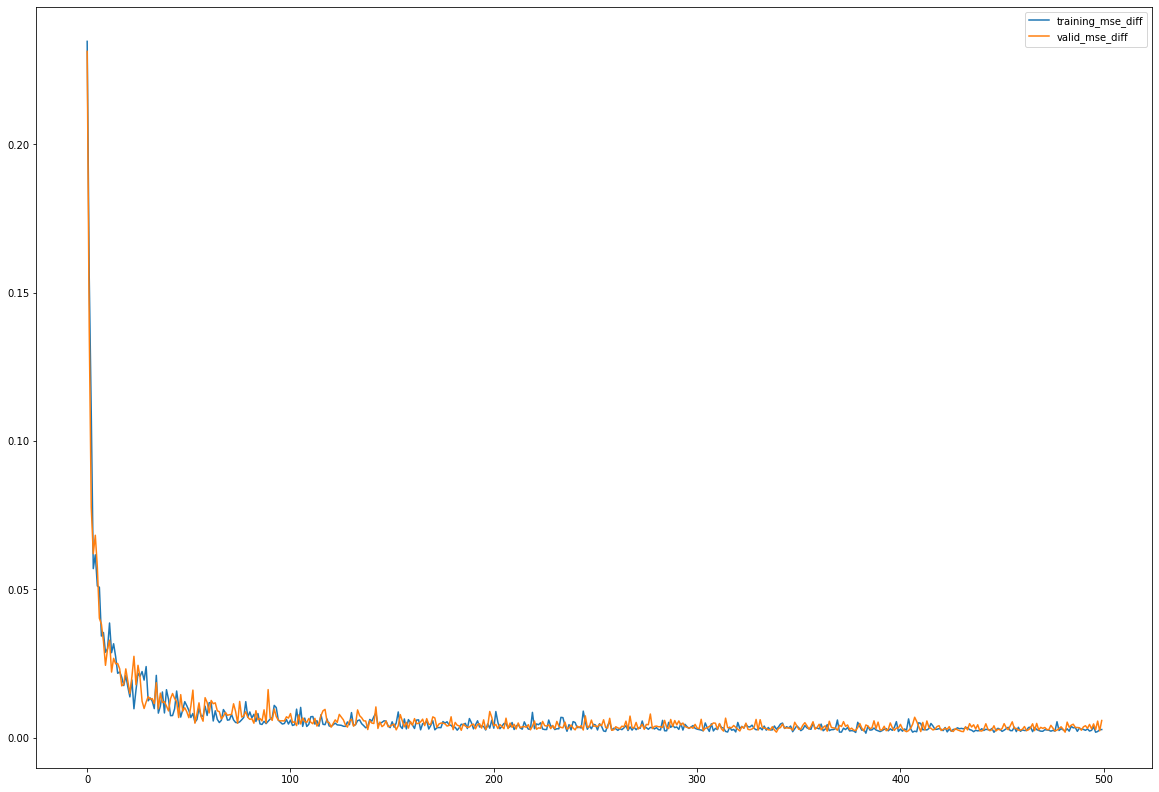

In [ ]:
performance1 = pd.DataFrame()
performance1['training_mse_diff'] = training_mse_dif
performance1['valid_mse_diff'] = valid_mse_dif
performance1.plot(figsize = (20,14))

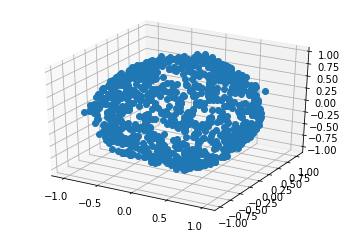

In [ ]:
prediction = model.predict(X_test)
f1, f2, f3 = prediction.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(f1, f2, f3, 'o')

In [ ]:
test_score(prediction, Y_test)

0.009327587240681187